!kaggle competitions download -c expedia-hotel-recommendations

In [1]:
import os
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

import seaborn as sns
sns.set_palette('Set2')
sns.set_color_codes("pastel")

In [2]:
folder = "/Users/reejungkim/Documents/Git/Recommender-System/expedia-hotel-recommendations"

In [3]:
os.listdir(folder)

['destinations.csv', 'test.csv', 'train.csv', 'sample_submission.csv']

In [4]:
df = pd.read_csv(folder+"/"+'train.csv')
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


df.isnull().sum()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_time                  object 
 1   site_name                  int64  
 2   posa_continent             int64  
 3   user_location_country      int64  
 4   user_location_region       int64  
 5   user_location_city         int64  
 6   orig_destination_distance  float64
 7   user_id                    int64  
 8   is_mobile                  int64  
 9   is_package                 int64  
 10  channel                    int64  
 11  srch_ci                    object 
 12  srch_co                    object 
 13  srch_adults_cnt            int64  
 14  srch_children_cnt          int64  
 15  srch_rm_cnt                int64  
 16  srch_destination_id        int64  
 17  srch_destination_type_id   int64  
 18  is_booking                 int64  
 19  cnt                        int64  
 20  

In [6]:
df.select_dtypes(include=[object]).columns
#df.select_dtypes(exclude=[object])

Index(['date_time', 'srch_ci', 'srch_co'], dtype='object')

In [7]:
np.sort( df.channel.unique() )

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [9]:
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month

In [10]:
df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,year,month
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,8250,1,0,3,2,50,628,1,2014,8
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,8250,1,1,1,2,50,628,1,2014,8
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,8250,1,0,1,2,50,628,1,2014,8
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,14984,1,0,1,2,50,1457,80,2014,8
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,14984,1,0,1,2,50,1457,21,2014,8


# EDA

## bookings

### number of bookings trend

In [11]:
df.pivot_table(index= ['is_booking'],
               columns=['year', 'month'],
               values='user_id', aggfunc='count')

year          2013                                                           \
month           1       2       3       4       5       6        7       8    
is_booking                                                                    
0           702280  740846  911899  856602  870820  918199  1000389  930255   
1            68894   77384   89031   85899   90942   90610    95810   94400   

year                        ...     2014                                      \
month           9       10  ...       3        4        5        6        7    
is_booking                  ...                                                
0           869339  880535  ...  1604902  1625649  1724597  2016690  2602818   
1            89230   91181  ...   137341   144177   153949   165345   194550   

year                                                     
month            8        9        10       11       12  
is_booking                                               
0           2553020  2544327  2531493  2433073  2730209  
1            196055   197771   202426   188578   197109  

[2 rows x 24 columns]

### booking rates trend

Here the mean represents the booking conversion rate

In [19]:
booking = df.groupby(['year','month','channel'])[['is_booking']].agg(['count','sum', 'mean'])
booking.columns = booking.columns.droplevel()
booking.head()

count     sum      mean
year month channel                           
2013 1     0          87573    6808  0.077741
           1          86241    6681  0.077469
           2          38306    3193  0.083355
           3          40662    1852  0.045546
           4          17132    2743  0.160110
...                     ...     ...       ...
2014 12    5         204395   16665  0.081533
           6           3999     155  0.038760
           7          26494     919  0.034687
           8           7058     551  0.078067
           9        1488195  106793  0.071760

[262 rows x 3 columns]

In [78]:
booking.groupby(level=0).sum()

,count,sum,mean
year,,,
2013,11186881,1024389,11.427897
2014,26483412,1976304,9.217584


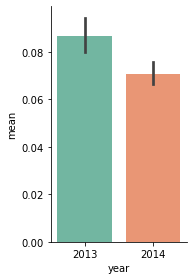

In [20]:
sns.catplot(x='year', y='mean', data=booking.reset_index(),
           kind='bar', height=4, aspect=.7)

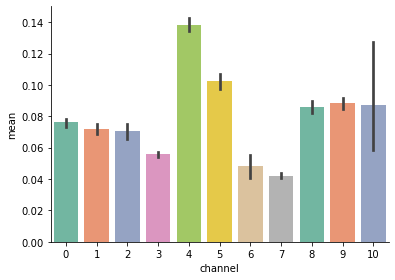

In [72]:
sns.catplot(x='channel', y='mean', data=booking.reset_index(),
           kind='bar', height=4, aspect=1.4, palette='Set2')

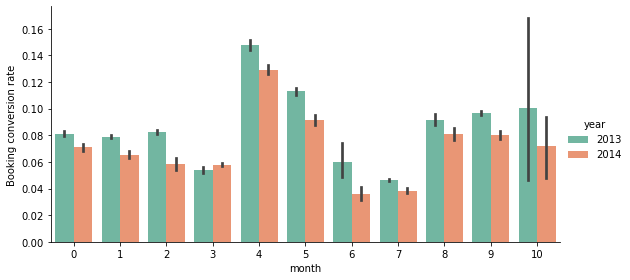

In [101]:
sns.catplot(x='channel', y='mean', hue='year',data=booking.reset_index(),
           kind='bar', height=4, aspect=2, palette='Set2').set_axis_labels('month','Booking conversion rate')

sns.catplot(x='month', y='mean', col='year',
            hue='channel',dodge=False, 
            data= booking.reset_index(),
           kind='bar', height=4, aspect=2, palette='Set2')

In [67]:
booking_stat = booking.reset_index().melt(id_vars=['year', 'month', 'channel'])
booking_stat.head()

,year,month,channel,variable,value
0,2013,1,0,count,87573.0
1,2013,1,1,count,86241.0
2,2013,1,2,count,38306.0
3,2013,1,3,count,40662.0
4,2013,1,4,count,17132.0


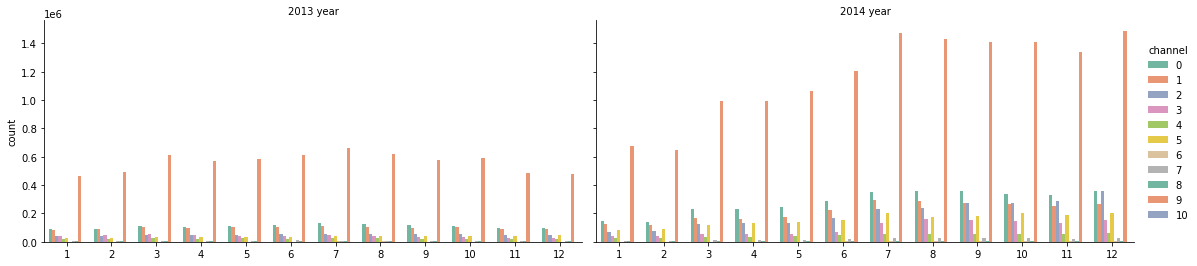

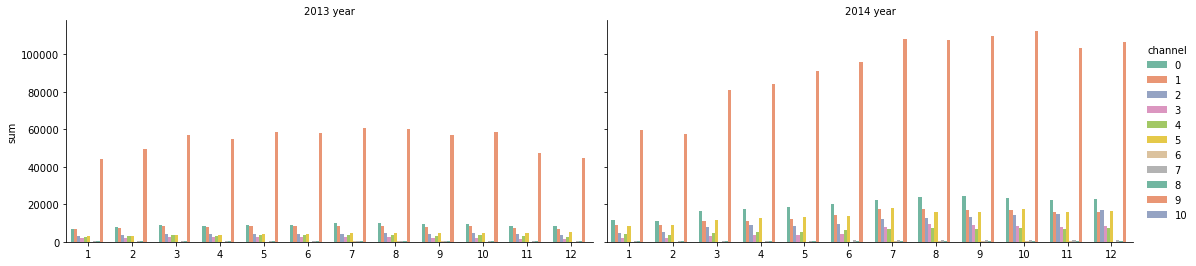

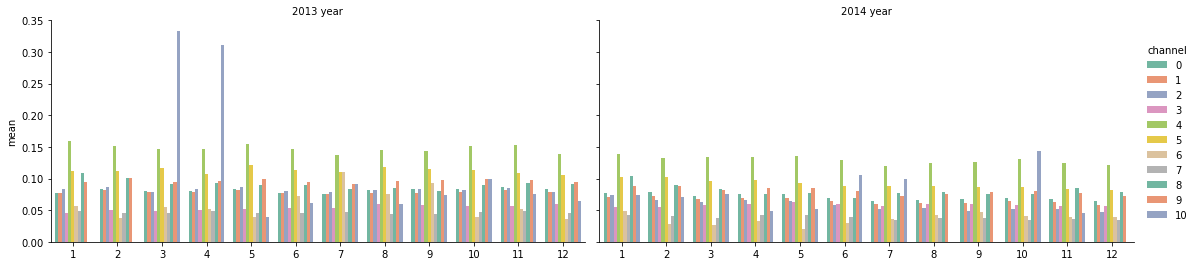

In [97]:
for i in booking_stat.variable.unique():
    g = sns.catplot(x='month', y='value', col='year',
                hue='channel',dodge=True, 
                data= booking_stat.loc[booking_stat['variable']== i],
               kind='bar', height=4, aspect=2, palette='Set2')
    (g.set_axis_labels("", i)).set_titles("{col_name} {col_var}") 

     

#user_starting_time = df.groupby('user_id')[['date_time']].min()
#user_ending_time = 
#df.groupby(['user_id', 'srch_destination_type_id'])[['date_time']].max()

df.groupby('channel')[['user_id']].count()

df.corr()[['hotel_cluster']].sort_values(by='hotel_cluster', ascending=False)

df.groupby(['hotel_cluster', 'hotel_market']).agg({
                                        'user_id': lambda user: len(user),
                                        'is_booking': lambda booking:  booking.sum(),
                                        })

In [9]:
df = train.groupby(['srch_destination_id','hotel_cluster'])['is_booking'].agg(['sum','count']).reset_index()